<a href="https://colab.research.google.com/github/ThiagoMSLK/projects/blob/main/Project/Personal/extras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Relatório Semestral de Extras Efetuadas***

# Preparação

Fui solicitado a criar uma planilha para registrar todas as "Extras". Além disso, considerei a ideia de criar um relatório para documentar o que tenho aprendido.
E esse foi o resultado espero que gostem.

Definição de Extras:
Extras são dias ou turnos adicionais trabalhados, que geram um pagamento extra e não são contabilizados no banco de horas.

Download e extração das planilhas.

In [ ]:
# !wget -q https://github.com/ThiagoMSLK/files/raw/main/extras.zip
!wget -q https://github.com/ThiagoMSLK/projects/raw/main/Data/extras.zip
!unzip -q ./extras.zip

De todas as bibliotecas essas são as únicas que não vem instalados no notebook.

In [ ]:
!pip install unidecode
!pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.6 MB/s eta 0:00:00


# Importes, caminhos e tuplas

Importe das bibliotecas.

In [ ]:
# Importes de biblioteca interna:
import os

# Importes de biblioteca externa:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import xlsxwriter as xlsx
import unidecode

Caminhos e listas que serão usados

In [ ]:
# Caminho
EXTRAS = "./extras/extras_"
CSV = "./extras/extras_semestral.csv"
RELATORIO = './relatorio_extras_semestral.xlsx'
GRAFICOS = './graficos/'
# PASTA = './extras/'

# Tuplas
MES_XLSX = ('janeiro_2024.xlsx','fevereiro_2024.xlsx','março_2024.xlsx','abril_2024.xlsx','maio_2024.xlsx','junho_2024.xlsx')
meses = ('janeiro', 'fevereiro','março','abril','maio', 'junho')

# Agregador

📊 ***Objetivo do Agregador***

Neste trecho, vamos trabalhar para garantir a uniformidade dos dados nas planilhas e, em seguida, exportá-los para um arquivo CSV de forma organizada e padronizada.

🗂️ ***Estrutura dos Dados***

**Uniformidade dos Dados**: O primeiro passo é assegurar que todos os dados nas planilhas sigam um padrão consistente.

**Exportação para CSV**: Após a padronização, os dados serão adicionados a um arquivo CSV, facilitando a análise e o compartilhamento.

📝 **Observação Importante**

Coluna de Mês: Foi incluída uma coluna adicional no CSV que indica o mês referente. Essa informação será essencial para análises futuras.

In [ ]:
# Criando cabeçalho do arquivo CSV
if not os.path.exists(CSV):
    with open(file=CSV, mode='w', encoding='utf8') as fp:
        fp.write('Nome;Função;Dia;Valor;Mes\n')

# Criando o arquivo CSV
for estencao, mes in zip(MES_XLSX, meses):

    # Criando os DataFrames com os EXCELs
    df_extra = pd.read_excel(EXTRAS+estencao, skiprows=11)
    # Removendo os acentos
    df_extra['Função'] = df_extra['Função'].apply(lambda acentos: unidecode.unidecode(acentos))
    df_extra['Nome'] = df_extra['Nome'].apply(lambda acentos: unidecode.unidecode(acentos))

    # Covertendo a coluna Dia para formado datetime (caso necessário)
    df_extra['Dia'] = pd.to_datetime(df_extra['Dia'])
    df_extra['Dia'] = df_extra['Dia'].dt.date

    # Adicionando os dados do Dataframe para o arquivo CSV
    with open(file=CSV, mode='a', encoding='utf8') as fp:
        for nome, funcao, dia, valor in zip(df_extra['Nome'],df_extra['Função'],df_extra['Dia'],df_extra['Valor']):
            fp.write(f'{nome.strip()};{funcao.strip()};{dia};{float(valor)};{mes}\n')

# ***Analise***

Criando o DataFrame com o arquivo CSV criado anteriormente

Fazendo Schema, observando a do DataFrame estrutura e vendo se tem nulos nele.

In [ ]:
# Lendo o DataFrame
extra_df = pd.read_csv(CSV,  sep= ';')

Schema

In [ ]:
extra_df.head(10)

,Nome,Função,Dia,Valor,Mes
0,Camila,Pia,2024-01-04,130.0,janeiro
1,Eduardo,Salao,2024-01-05,300.0,janeiro
2,Camila,Pia,2024-01-05,130.0,janeiro
3,Lucas,Cozinha,2024-01-09,150.0,janeiro
4,Camila,Pia,2024-01-09,130.0,janeiro
5,Sabrina,Salao,2024-01-14,450.0,janeiro
6,Camila,Pia,2024-01-14,60.0,janeiro
7,Ana,Cozinha,2024-01-14,150.0,janeiro
8,Gabriel,Cozinha,2024-01-15,300.0,janeiro
9,Mariana,Cozinha,2024-01-15,450.0,janeiro


In [ ]:
extra_df.dtypes

,0
Nome,object
Função,object
Dia,object
Valor,float64
Mes,object


In [ ]:
extra_df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
Nome,201,46,Camila,18
Função,201,7,Cozinha,128
Dia,201,98,2024-03-17,6
Mes,201,6,março,48


Estrutura

In [ ]:
extra_df.shape

(201, 5)

In [ ]:
extra_df.columns

Index(['Nome', 'Função', 'Dia', 'Valor', 'Mes'], dtype='object')

In [ ]:
extra_df.index

RangeIndex(start=0, stop=201, step=1)

In [ ]:
extra_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nome    201 non-null    object 
 1   Função  201 non-null    object 
 2   Dia     201 non-null    object 
 3   Valor   201 non-null    float64
 4   Mes     201 non-null    object 
dtypes: float64(1), object(4)
memory usage: 8.0+ KB


Nulos

In [ ]:
extra_df.isna().any()

,0
Nome,False
Função,False
Dia,False
Valor,False
Mes,False


Conforme observamos nas análises anteriores, o DataFrame foi retornado de forma perfeita.

# ***Relatório***

Para manter o projeto organizado, vamos criar uma pasta chamada "graficos".

In [ ]:
# Criando pasta para organização
if not os.path.exists(GRAFICOS):
  os.mkdir(GRAFICOS)

📝 **Criação do Arquivo Excel**

Nesta seção, criamos um novo arquivo Excel para armazenar o relatório:

**Criação do Workbook**: Iniciamos um novo workbook com o nome especificado em `RELATORIO`.

**Adição de Worksheet**: Adicionamos uma nova planilha (worksheet) ao workbook para organizar os dados.

🎨 **Formatação do Cabeçalho**

Para melhorar a legibilidade e a apresentação dos dados:

Negrito e Centralização: Definimos um formato para o cabeçalho das colunas, que inclui negrito e alinhamento central, tanto horizontal quanto vertical.

In [ ]:
# Criando o arquivo Excel
workbook = xlsx.Workbook(RELATORIO)
worksheet = workbook.add_worksheet()

# Negrito e centralizar cabeçalho
cabecalho = workbook.add_format({'bold': True, 'align':'center', 'valign':'vcenter'})

📊 **Criação e Salvamento de Gráficos**

Nesta seção, vamos criar, formatar, e salvar gráficos para cada mês nos formatos de pizza e linha. Os gráficos serão salvos tanto no arquivo Excel quanto na pasta designada.

Inicialização das Variáveis:

Definimos as variáveis coluna e linha para organizar a inserção dos gráficos no Excel.
Loop pelos Meses:

Iteramos sobre cada mês presente na lista meses para gerar gráficos personalizados.


🥧 **Gráfico de Pizza**

**Filtragem dos Dados**: Filtramos os dados para cada mês e calculamos a proporção de "extras" por função.

**Criação do Gráfico**:
Configuramos o gráfico de pizza, ajustando o tamanho e as legendas.
Adicionamos um título e melhoramos a legibilidade das legendas.

**Salvamento**: O gráfico é salvo em formato PNG na pasta especificada e visualizado no notebook.

📈 **Gráfico de Linha**

**Filtragem dos Dados**: Selecionamos e agregamos os dados de "extras" por dia e função para cada mês.
Transformação dos Dados: Utilizamos a função melt para reorganizar o DataFrame no formato longo, necessário para o gráfico de linha.

**Criação do Gráfico**:
Utilizamos o Seaborn para criar um gráfico de linha com um estilo de grade.
Adicionamos títulos e ajustamos a rotação dos rótulos das datas no eixo x.
Garantimos que os elementos do gráfico não se sobreponham com `plt.tight_layout()`.

**Salvamento**: O gráfico de linha também é salvo em formato PNG na pasta especificada e visualizado no notebook.

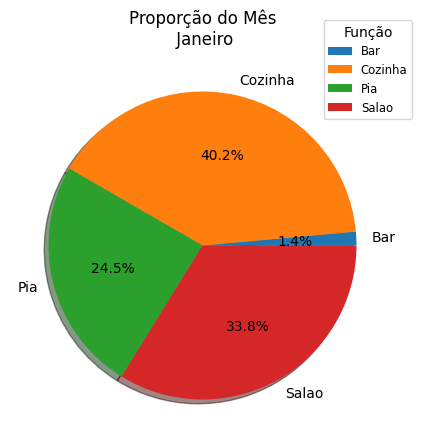

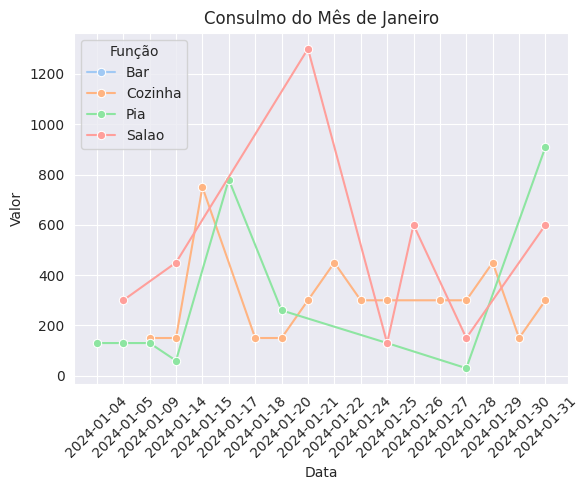

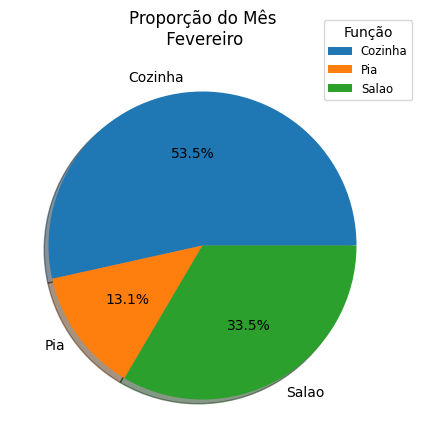

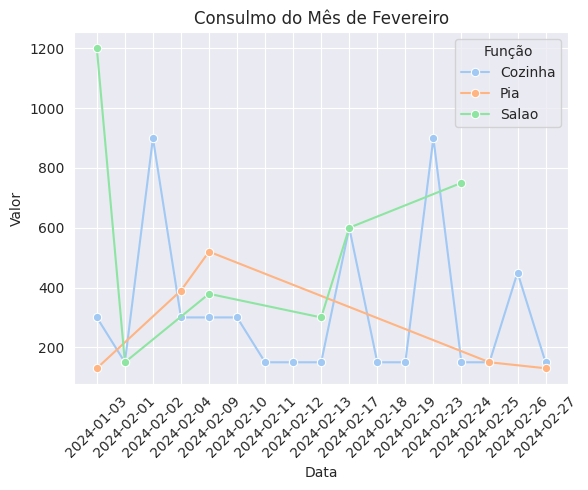

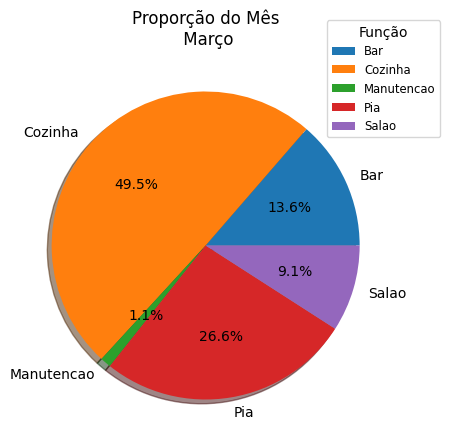

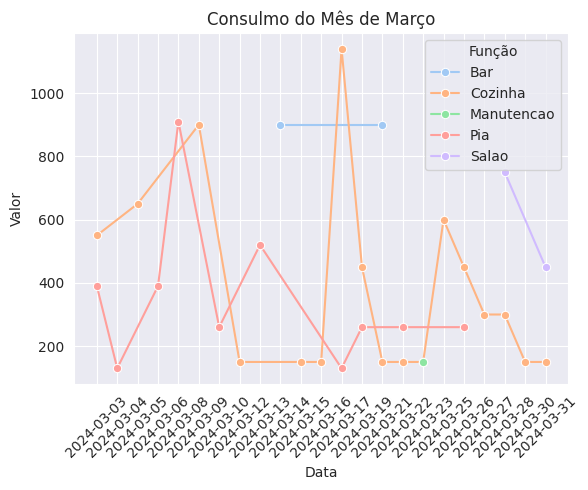

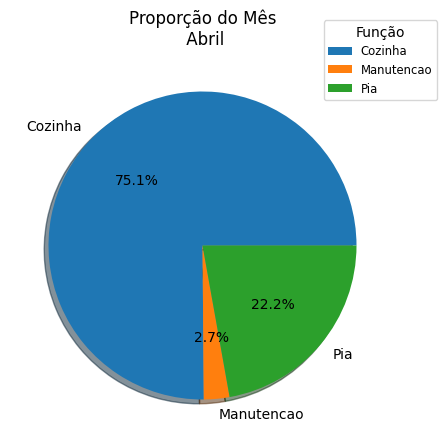

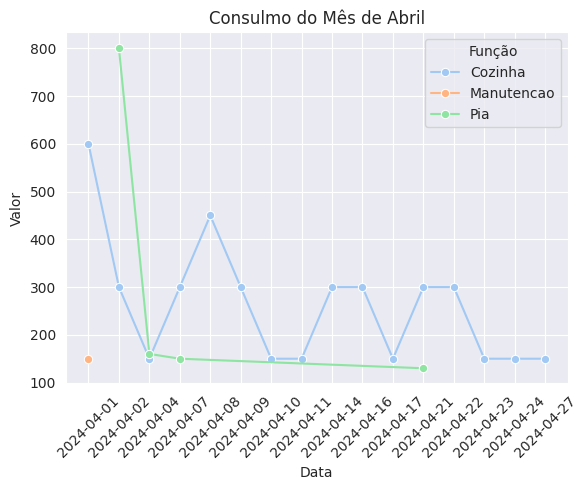

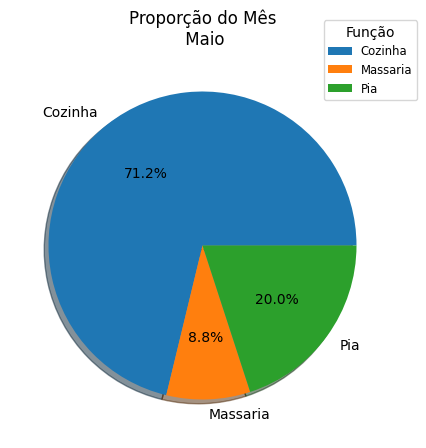

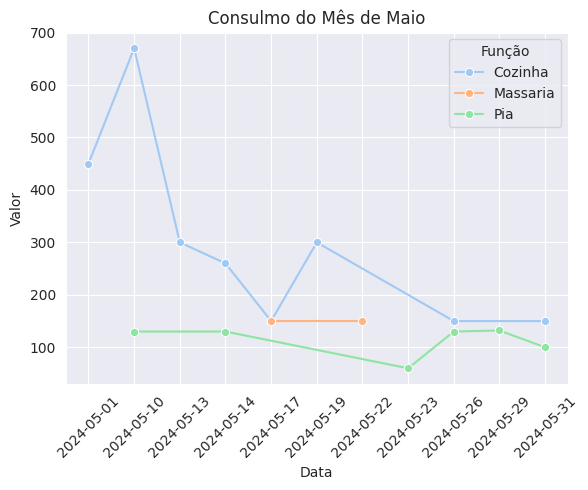

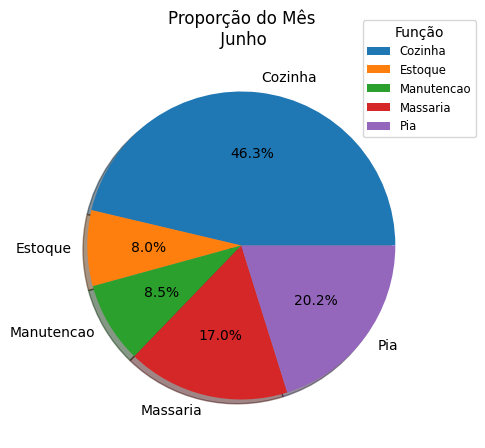

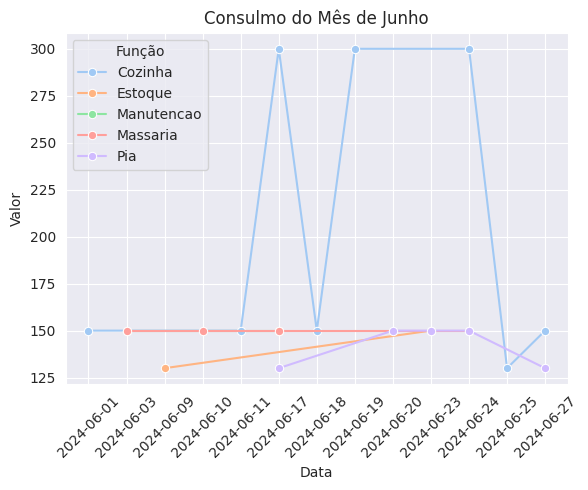

In [ ]:
# Criando, formatando, adicionando e salvando os graficos no arquivo Excel e pasta
coluna = 0
linha = 0
for mes in meses:

########################################
    # Grafico de Pizza
    # Filtrando os dados do grafico
    dados_mes = extra_df.query(f'Mes == "{mes}"').groupby('Função')['Valor'].agg('sum').reset_index(name=f'Proporção de extras do mês de {mes}')
    # Criando o grafico
    fig, ax = plt.subplots(figsize= (6, 5))
    dados_mes.plot.pie(
        y=f'Proporção de extras do mês de {mes}',
        labels= dados_mes['Função'],
        shadow = True,
        legend = True,
        ax=ax,
        autopct= '%1.1f%%'
        )
    # (1)Nome do Eixo Y / (2)Adicionar os dados / (3)Ativar sombra / (4)Ativar legenda / (5)Tamanho / (6)Porgentagem

    # Melhorar a legibilidade das legendas
    ax.legend(title= 'Função', bbox_to_anchor=(0.8, 1.1), loc= 'best', fontsize= 'small')

    # Adicionar título ao gráfico
    ax.set_ylabel('') # Remove o rótulo do eixo y (Evitar dublicada)
    ax.set_title(f'Proporção do Mês\n {mes.capitalize()}')

    # Salvando o caminho + nome do grafico
    salvar_grafico = GRAFICOS+f'grafico_{mes}.png'

    # Salvando o grafico
    plt.savefig(salvar_grafico)
    plt.show()
    plt.close(fig)

########################################
    # Grafico de linha
    # Filtrando os dados de cada mês
    grafico_linha_df = extra_df.query(f'Mes == "{mes}"')
    grafico_linha_df = grafico_linha_df.groupby(['Dia','Função'])['Valor'].sum().unstack()

    # Derretendo o DataFrame para o formato longo (Nem eu entendi direito isso ainda, mas deu certo ^^ )
    grafico_linha_df = grafico_linha_df.reset_index().melt(id_vars='Dia', var_name='Função', value_name='Valor')

    # Criando o Grafico de linha
    # Estilo de Grade
    with sns.axes_style('darkgrid'):
        plt.figure(figsize=(6, 5)) # Tamanho
        # Criando o grafico
        grafico_linha = sns.lineplot(data=grafico_linha_df, x='Dia', y='Valor', hue='Função', palette='pastel', marker='o')
        # Titulos
        grafico_linha.set(title=f'Consulmo do Mês de {mes.capitalize()}', xlabel='Data', ylabel='Valor')
        # Rotação
        plt.xticks(rotation=45)
        # Evitar sobreposição dos elementos do grafico
        plt.tight_layout()
        # Salvando o grafico
        plt.savefig(GRAFICOS+f'grafico_linha_{mes}.png')
        plt.show()
        plt.close()


📑 **Inserção de Gráficos e Informações no Arquivo Excel**

Nesta etapa, vamos inserir os gráficos e dados agregados em um arquivo Excel, organizando as informações em linhas e colunas específicas.

**Inicialização das Variáveis**:

*`indice_meses`*: Usado para iterar sobre os meses e acessar os gráficos e dados correspondentes.
Loop para Inserção de Gráficos e Dados:

**Definição das Linhas e Colunas**:
Usamos dois loops for para definir as linhas e colunas onde os gráficos e dados serão inseridos.
Inserção dos Gráficos:

**Gráficos de Pizza**: Inserimos o gráfico de pizza correspondente ao mês na posição atual definida por linha e coluna.

**Gráficos de Linha**: Inserimos o gráfico de linha correspondente ao mês na posição ajustada logo abaixo do gráfico de pizza.

**Adição de Títulos**: Mesclamos as células no topo da seção para adicionar um título que resume os dados do mês atual, aplicando o formato definido anteriormente (cabecalho).
Agregação e Inserção de Dados:

**Filtragem e Agregação**: Calculamos a soma dos valores para cada função no mês atual.
Inserção de Dados: Escrevemos os dados agregados na planilha, alinhando as funções e valores nas células apropriadas.

**Atualização das Variáveis de Controle**:

`Coluna`: Ajustamos a posição da coluna para a próxima seção de gráficos e dados.

`Linha`: Atualizamos a linha para a próxima faixa de gráficos e dados na próxima iteração.

In [ ]:
########################################
# Inserir os graficos e informações no arquivo Excel
# Loop de "for" para adicionar os dados nas linhas e colunas certas

indice_meses = 0
for l in range(2):# Definindo a Linha
    for c in range(3):# Definindo a Colunha

        # Inserindo os graficos de pizza
        worksheet.insert_image(linha+2,coluna, GRAFICOS+f'grafico_{meses[indice_meses]}.png')

        # Inserindo os graficos de linha
        worksheet.insert_image(linha+26, coluna,GRAFICOS+f'grafico_linha_{meses[indice_meses]}.png')

        # Mesclando as linhas para ser adicionado um titulo
        worksheet.merge_range(linha, coluna, linha, coluna+8, f'Resumo de Extras do Mês de {meses[indice_meses].capitalize()}', cabecalho)

        # Filtrando e agregando os dados de casa mês
        resulmo_mes = extra_df.query(f'Mes == "{meses[indice_meses]}"').groupby('Função')['Valor'].agg('sum')

        # Escrevendo os dados de cada mês
        for indice, (funcao, valor) in enumerate(zip(resulmo_mes.index, resulmo_mes.iloc)):
            worksheet.write(linha + 52 + indice, coluna, funcao)
            worksheet.write(linha + 52 + indice, coluna + 1, valor)

        coluna += 9
        indice_meses += 1
    coluna = 0
    linha += 60

📝 **Adição de Título de Visão Geral**

Para fornecer um resumo claro e destacado, adicionamos um título de "Visão Geral Do Semestre" na planilha Excel. Isso ajuda a agrupar e identificar rapidamente a seção relevante de dados.

**Mesclagem de Células**: As células da linha 121 até a 123 e da coluna 0 até a 26 são mescladas para criar um espaço amplo para o título.

**Título**: O texto 'Visão Geral Do Semestre' é exibido em maiúsculas para destacar a seção.

**Formatação**: O título utiliza o formato de cabeçalho (cabecalho), que aplica negrito e centralização ao texto.

In [ ]:
# Mesclando as linhas para ser adicionado um titulo
worksheet.merge_range(121, 0, 123, 26, 'Visão Geral Do Semestre'.upper(), cabecalho)

0

📈 **Gráfico de Calor (Heatmap)**

Criamos um gráfico de calor para visualizar os valores de "extras" por função e mês.

**Criação do Heatmap**:

**Dados**: Usamos uma tabela dinâmica (`pivot_table`) para agregar os valores.

**Gráfico**: Criamos o heatmap com Seaborn, com anotações e uma paleta de cores YlGnBu.

**Título**: Adicionamos o título 'Heatmap de Valores de Extras por Função e Mês'.

**Salvamento e Inserção**:

**Salvamento**: O gráfico é salvo como heatmap_semestral.png.

**Inserção**: Adicionamos o gráfico na planilha Excel na posição linha+6 e coluna.

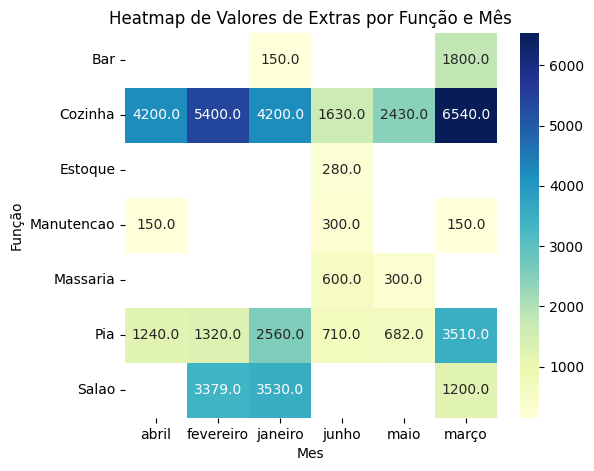

0

In [ ]:
#  Criando e inserindo o Gráfico de Calor (Heatmap)
pivot_table = extra_df.pivot_table(index='Função', columns='Mes', values='Valor', aggfunc='sum')
plt.figure(figsize=(6, 5))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Heatmap de Valores de Extras por Função e Mês')
plt.savefig(GRAFICOS+'heatmap_semestral.png')
plt.show()
plt.close()
worksheet.insert_image(linha+6,coluna, GRAFICOS+'heatmap_semestral.png')

📊 **Gráfico de Barras (Total da Função)**

Criamos um gráfico de barras para comparar a soma total dos valores por função durante o semestre.

**Criação do Gráfico**:

**Dados**: Agrupamos os dados por função e calculamos a soma total.

**Gráfico**: Utilizamos o Seaborn para criar o gráfico de barras com uma paleta pastel.

**Título e Rótulos**: Adicionamos título e rótulos aos eixos.

**Anotações**: Incluímos os valores das barras diretamente no gráfico.

**Salvamento e Inserção**:

**Salvamento**: O gráfico é salvo como total_semestral_funcao.png.

**Inserção**: Adicionamos o gráfico na planilha Excel na posição linha+6 e coluna+9.

<ipython-input-22-c9c588448979>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_funcao, x='Valor', y='Função', palette='pastel')


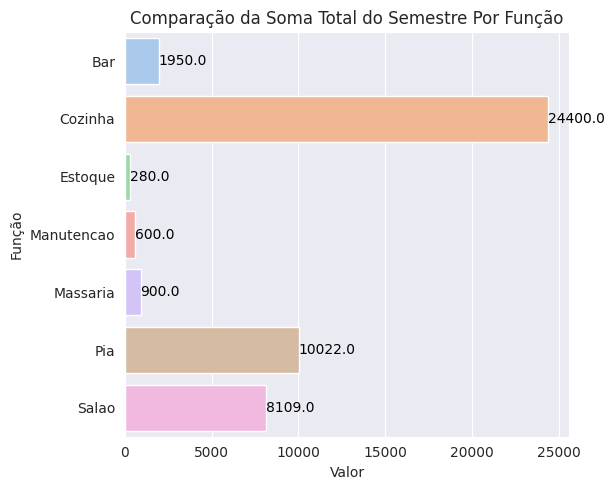

0

In [ ]:
########################################
# Criando Grafico de Barra (Total da Função)
df_funcao = extra_df.groupby('Função')['Valor'].agg('sum').reset_index()
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(6, 5))
    ax = sns.barplot(data=df_funcao, x='Valor', y='Função', palette='pastel')
    ax.set(title='Comparação da Soma Total do Semestre Por Função', xlabel= 'Valor', ylabel='Função')
    plt.tight_layout()
    for i, valor in enumerate(df_funcao['Valor']):
        ax.text(valor, i, f'{valor}',color='black', ha='left', va='center')
    plt.savefig(GRAFICOS+'total_semestral_funcao.png')
    plt.show()
    plt.close()
worksheet.insert_image(linha+6,coluna+9, GRAFICOS+'total_semestral_funcao.png')

📊 **Gráfico de Barras (Total do Mês)**

Criamos um gráfico de barras para comparar a soma total dos valores para cada mês.

**Criação do Gráfico**:

**Dados**: Agrupamos os dados por mês e calculamos a soma total.

**Gráfico**: Utilizamos o Seaborn para criar o gráfico de barras com a paleta dark.

**Título e Rótulos**: Adicionamos título e rótulos aos eixos.

**Anotações**: Incluímos os valores das barras diretamente no gráfico.

**Salvamento e Inserção**:

**Salvamento**: O gráfico é salvo como total_semestral_mes.png.

**Inserção**: Adicionamos o gráfico na planilha Excel na posição linha+6 e coluna+18.

<ipython-input-23-a7bb4cd46b1c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_meses, x='Valor', y='Mes', palette='dark')


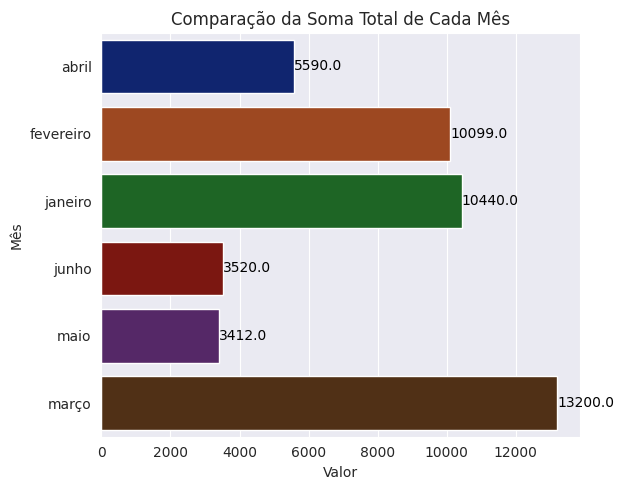

In [ ]:
# Criando Grafico de Barra (Total da Mês)
df_meses = extra_df.groupby('Mes')['Valor'].agg('sum').reset_index()
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(6,5))
    ax = sns.barplot(data=df_meses, x='Valor', y='Mes', palette='dark')
    ax.set(title='Comparação da Soma Total de Cada Mês', xlabel='Valor', ylabel='Mês')
    plt.tight_layout()
    for i, valor in enumerate(df_meses['Valor']):
        ax.text(valor, i, f'{valor}', color='black', ha='left', va='center')
        plt.savefig(GRAFICOS+'total_semestral_mes.png')
    plt.show()
    plt.close()
    worksheet.insert_image(linha+6,coluna+18, GRAFICOS+'total_semestral_mes.png')

📂 **Fechamento do Workbook**

Após adicionar todos os gráficos e dados ao arquivo Excel, finalizamos o processo salvando e fechando o workbook.

In [ ]:
# Fechando o workbook
workbook.close()

# ***Insights***

Como podemos ver, o setor da Cozinha tem um consumo de "extras" muito superior aos demais. Com um cálculo simples da média, observamos que o gasto é aproximadamente R$4066,00 por mês. Isso levanta a questão de se não seria mais eficiente contratar mais um funcionário com um conhecimento geral sobre cada praça (fogão, josper, poqueta, etc.).

Por algum motivo que não conseguimos identificar com certeza, março apresenta um consumo muito superior ao dos outros meses.

# ***Considerações Finais***

**1 - Aprendizado em Curso**: Reconheço que há várias falhas no código e na análise. Estou ainda aprendendo e apreciaria a compreensão nesse processo.

**2 - Atualizações Futuras**: Pretendo atualizar o código futuramente para permitir a seleção do relatório para o primeiro semestre, segundo semestre ou anual.

**3 - Exploração do Power BI**: Pelo que observei superficialmente, o Power BI pode criar relatórios de forma muito mais eficaz e interativa do que o que fiz. Isso é algo que planejo explorar em estudos futuros.